In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance as pi
import seaborn as sns 
import pickle
%matplotlib inline 

In [5]:
df=pd.read_csv('masterData.csv')

In [6]:
plt.style.use('fivethirtyeight')

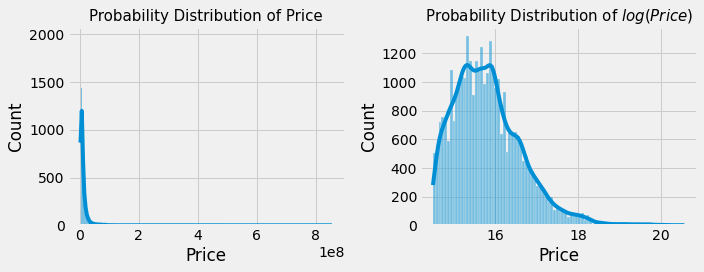

In [7]:
fig,ax=plt.subplots(1,2,figsize=(10,4))

sns.histplot(df['Price'],ax=ax[0],kde=True)
sns.histplot(x=np.log(df['Price']),ax=ax[1],kde=True)
ax[0].set_title('Probability Distribution of Price',fontsize=15)
ax[1].set_title('Probability Distribution of $log(Price)$',fontsize=15)
plt.tight_layout()
plt.savefig('app/images/PriceDistribution.jpeg',dpi=300)

TypeError: boxplot() got an unexpected keyword argument 'kde'

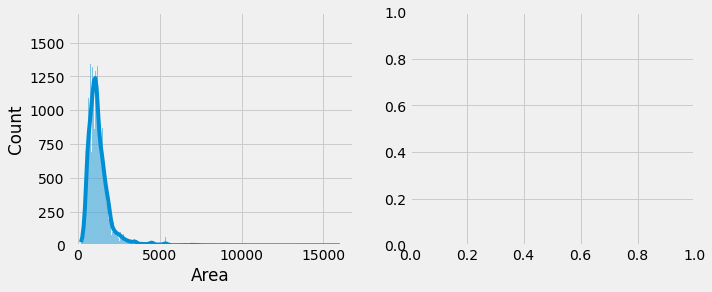

In [8]:
fig,ax=plt.subplots(1,2,figsize=(10,4))

sns.histplot(df['Area'],ax=ax[0],kde=True)
sns.boxplot(x=df['Area'],ax=ax[1],kde=True)
ax[0].set_title('Probability Distribution of Price',fontsize=15)
ax[1].set_title('Outlier Presence in Area',fontsize=15)
plt.tight_layout()
# plt.savefig('app/images/AreadDistribution.jpeg',dpi=300)

In [10]:
with open('PartB/models/savedModels/bagging.pickle','rb') as f:
    model=pickle.load(f)

In [11]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in model.estimators_
], axis=0)

In [46]:
train=pd.read_csv('train.csv')
train=train.drop('Price',axis=1).set_index('Unnamed: 0')
featureImportanceDf=pd.DataFrame()
featureImportanceDf['Name']=train.columns
featureImportanceDf['Importance']=feature_importances


In [13]:
test=pd.read_csv('test.csv')
y_test=test['Price']
test=test.drop('Price',axis=1).set_index('Unnamed: 0')

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [4]:
from eli5.sklearn import PermutationImportance

In [14]:
seed = 42
# Define permutation importance Object for random forest with n_iter = 10
perm = PermutationImportance(model,n_iter=10)
perm.fit(test,y_test)
# eli5.show_weights(perm, feature_names=X.columns.tolist())

PermutationImportance(estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=9),
                                                 n_estimators=1000, n_jobs=-1,
                                                 oob_score=True,
                                                 random_state=11),
                      n_iter=10)

In [47]:
permutationDf=pd.DataFrame()
permutationDf['Name']=train.columns
featureImportanceDf['Permuation Importance']=perm.feature_importances_
# featureImportanceDf['std']=perm.feature_importances_std_

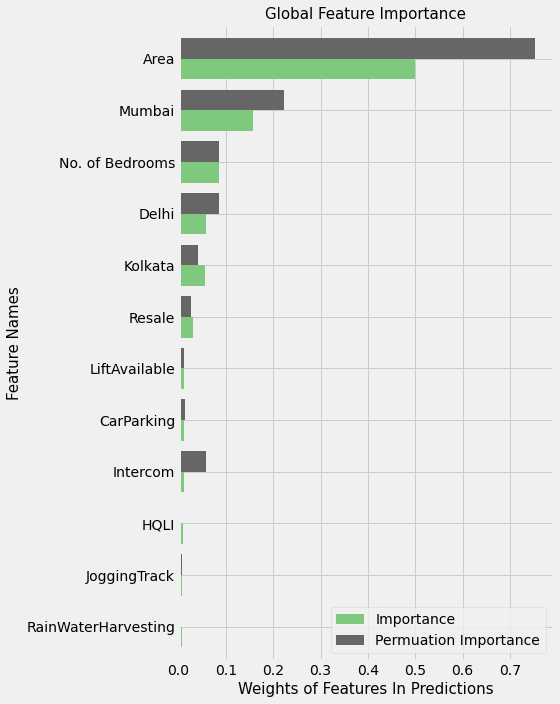

In [48]:
fig,ax=plt.subplots(1,1,figsize=(8,10))
featureImportanceDf.set_index('Name').sort_values('Importance').iloc[-12:].plot.barh(width=0.8,ax=ax,cmap='Accent')
ax.set_xlabel('Weights of Features In Predictions',fontsize=15)
ax.set_ylabel('Feature Names',fontsize=15) 
ax.set_title('Global Feature Importance',fontsize=15)
plt.legend(loc=4)


plt.tight_layout()
plt.savefig('app/images/featureImportanceGlobal.jpeg',dpi=300)